# 2a)

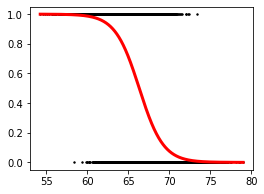

In [1]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Load data
data = np.loadtxt(r'C:\Users\victo\Aarhus universitet\Test - Dokumenter\Elektronik\Noter Elektronik\Elektronik 6. semester\ITMAL\ITMAL - Exercises\Lektion4\Filer\height_weight.csv', delimiter=';', skiprows=1)
# Height data is in second column - index 1
X = data[:,1]
y = data[:,0]

X = X[:, np.newaxis]


model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
# Plot
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', s=2)
X_test = np.linspace(np.min(X), np.max(X), np.size(X))

loss = expit(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

plt.show()


## Alternate
#
#X_test = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), np.size(X[:, 0])).reshape(-1,1)
#
#y_pred_prob = model.predict_proba(X_test)
#y_pred_prob = y_pred_prob[:,1]
#
#
# Plot
#plt.figure(1, figsize=(4, 3))
#plt.clf()
#
#plt.scatter(X.ravel(), y, color='black', s=2)
#plt.plot(X_test, y_pred_prob, color='red', linewidth=3)
#plt.show()

tekst


# 2b)

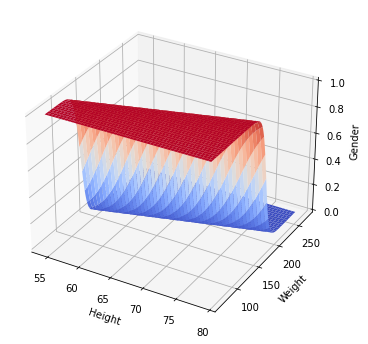

In [173]:
%reset -f
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import cm

# Load data
data = np.loadtxt(r'C:\Users\victo\Aarhus universitet\Test - Dokumenter\Elektronik\Noter Elektronik\Elektronik 6. semester\ITMAL\ITMAL - Exercises\Lektion4\Filer\height_weight.csv', delimiter=';', skiprows=1)
# Height data is in second column - index 1
X = data[:,1:3]
y = data[:,0]


model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Setup axis
height_axis = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), np.size(X[:, 0]))
weight_axis = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), np.size(X[:, 1]))

Height_axis, Weight_axis = np.meshgrid(height_axis, weight_axis)
w1 = model.coef_[0,0]
w2 = model.coef_[0,1]

Gender_axis = 1 / (1 + np.exp(-(w1 * Height_axis + w2 * Weight_axis)))

# Plot a basic wireframe.
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Height_axis, Weight_axis, Gender_axis, cmap=cm.coolwarm,linewidth=0)

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender')

plt.show()


tekst

# 1c)


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix

def print_error_rates_info(y_true, y_predict):
    accuracy = accuracy_score(y_true, y_predict, normalize=False) / float(y_true.size)
    error_rate = zero_one_loss(y_true, y_predict)
    print(f"Error rate: {error_rate}")
    print(f"Accuracy: {accuracy}")
    cfm = confusion_matrix(y_true, y_predict)
    print(f"confusion_matrix: \n {cfm}")

# Load data
data = np.loadtxt(r'C:\Users\victo\Aarhus universitet\Test - Dokumenter\Elektronik\Noter Elektronik\Elektronik 6. semester\ITMAL\ITMAL - Exercises\Lektion4\Filer\height_weight.csv', delimiter=';', skiprows=1)
# Height data is in second column - index 1
X = data[:,1:3]
y = data[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


print("Train set:")
print_error_rates_info(y_train, y_train_pred)
print("Test set:")
print_error_rates_info(y_test, y_test_pred)

Train set:
Error rate: 0.08171428571428574
Accuracy: 0.9182857142857143
confusion_matrix: 
 [[3174  289]
 [ 283 3254]]
Test set:
Error rate: 0.07733333333333337
Accuracy: 0.9226666666666666
confusion_matrix: 
 [[1431  106]
 [ 126 1337]]


tekst


